In [4]:
import sys
import pathlib

ROOT = pathlib.Path(".").absolute().parent.parent
sys.path.append(str(ROOT))

import os
from models.CNNs import CNNs
from datasets.SPCUP22MelDataModule import SPCUP22MelDataModule

from utils.metrics import (
    plot_classification_report,
    pytorch_lightning_make_predictions as make_predictions,
    print_scores
)

### Change this according to your system

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

### Without augmented data

In [6]:
hparams = {
    "network": "ResNet18",
}

checkpoint = CNNs.load_from_checkpoint(
    str(
        ROOT.joinpath(
            "checkpoints", "resnet18", "resnet18_on_train_dataset", "last.ckpt"
        )
    ),
    **hparams,
)

data_module = SPCUP22MelDataModule(
    64,
    dataset_root=pathlib.Path(
        ROOT.joinpath("data", "mel_feature", "spcup22")
    ).absolute(),
    config_file_path=str(ROOT.joinpath("config", "mel_feature.yaml")),
    should_include_augmented_data=False,
    num_workers=8,
)

### Predictions on test set

In [7]:
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module,
);

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/mel_feature/spcup22/spcup_2022_training.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/mel_feature/spcup22/spcup_2022_train_augmented.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/mel_feature/spcup22/spcup_2022_eval_part1_mel_features.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/mel_feature/spcup22/spcup_2022_eval_part2_mel_features.zip]...
Predicting: 100%|██████████| 19/19 [00:02<00:00,  7.48it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:172: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [8]:
print_scores(actual_labels, predictions)


    F1 Score: 0.96
    Accuracy: 0.96
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

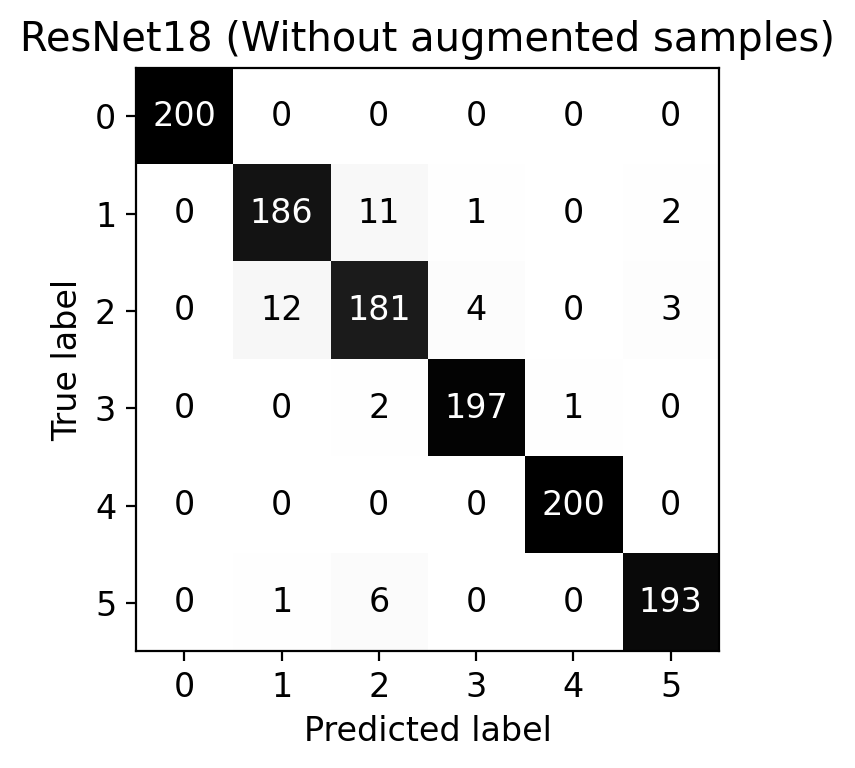

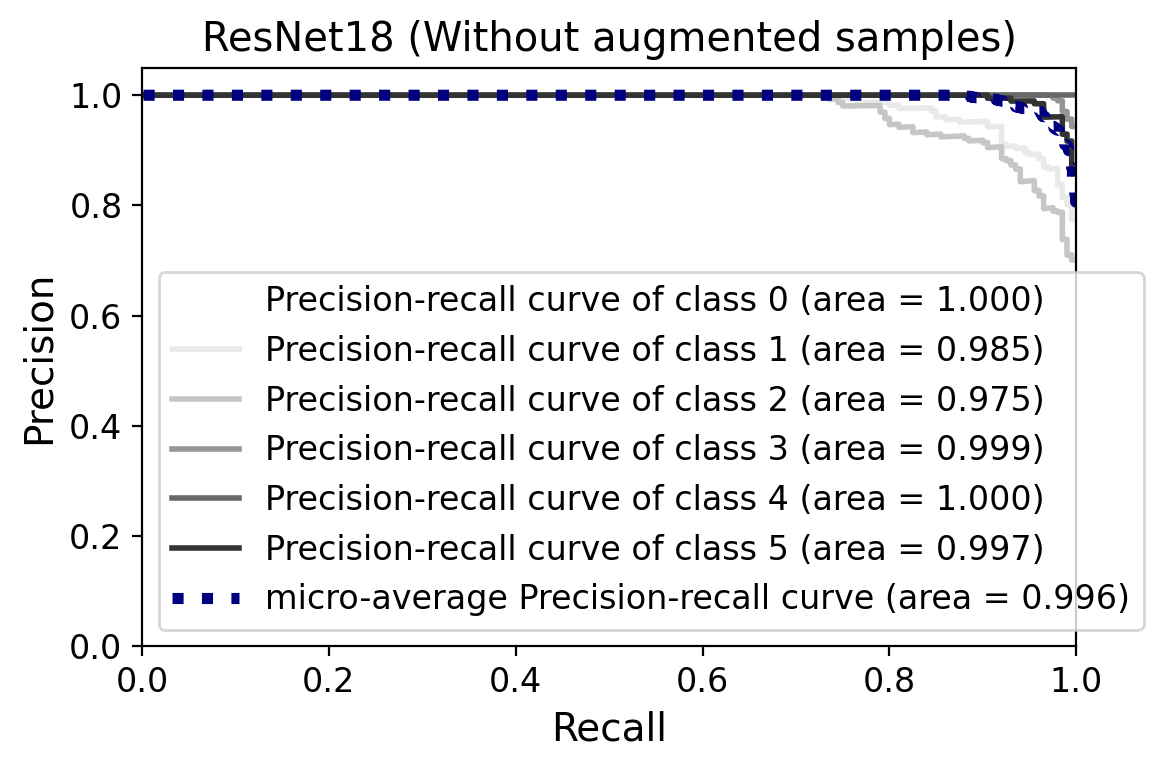

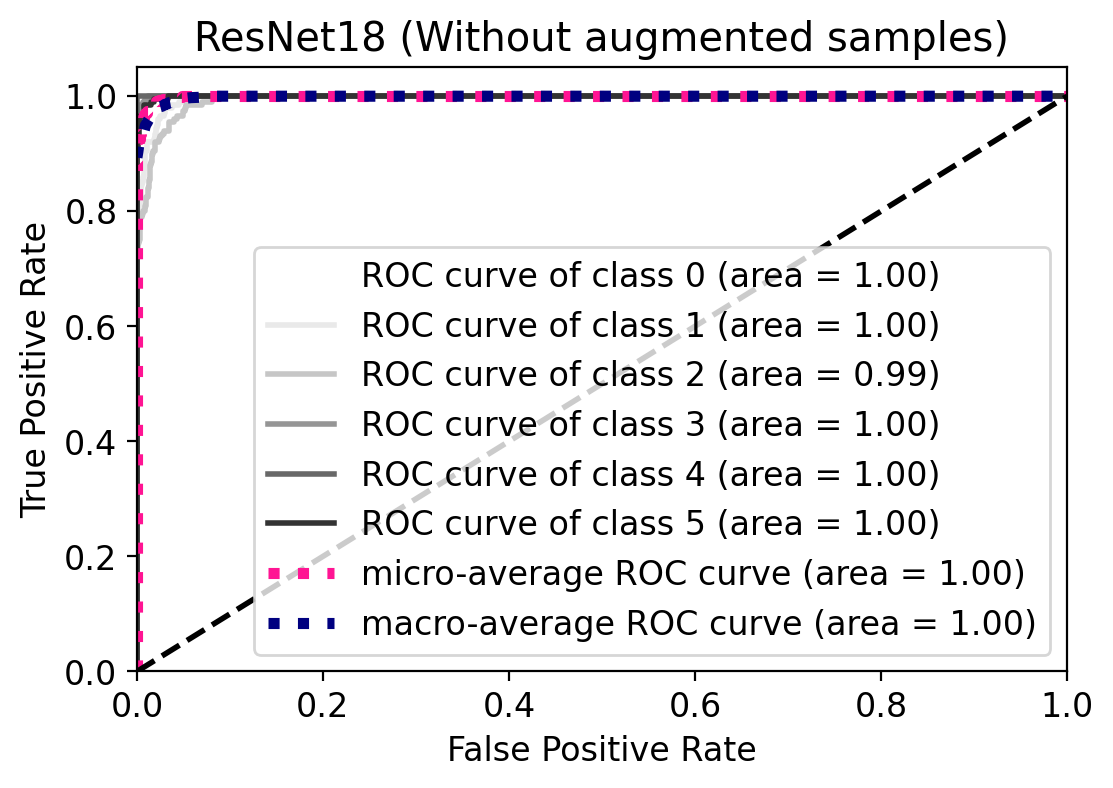

In [9]:
fig_save_path = str(ROOT.joinpath("results", "ResNet18", "without_augmented"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="ResNet18 (Without augmented samples)",
    save_path=fig_save_path
)

### With augmented data

In [10]:
hparams = {
    "network": "ResNet18",
}

checkpoint = CNNs.load_from_checkpoint(
    str(
        ROOT.joinpath(
            "checkpoints",
            "resnet18",
            "resnet18_on_train_dataset_augmented",
            "last.ckpt",
        )
    ),
    **hparams,
)

data_module = SPCUP22MelDataModule(
    64,
    dataset_root=pathlib.Path(
        ROOT.joinpath("data", "mel_feature", "spcup22")
    ).absolute(),
    config_file_path=str(ROOT.joinpath("config", "mel_feature.yaml")),
    should_include_augmented_data=True,
    num_workers=8,
)


In [11]:
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module
);

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/mel_feature/spcup22/spcup_2022_training.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/mel_feature/spcup22/spcup_2022_train_augmented.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/mel_feature/spcup22/spcup_2022_eval_part1_mel_features.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/mel_feature/spcup22/spcup_2022_eval_part2_mel_features.zip]...
Predicting: 100%|██████████| 75/75 [00:08<00:00,  8.63it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:172: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [12]:
print_scores(actual_labels, predictions)


    F1 Score: 0.97
    Accuracy: 0.97
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

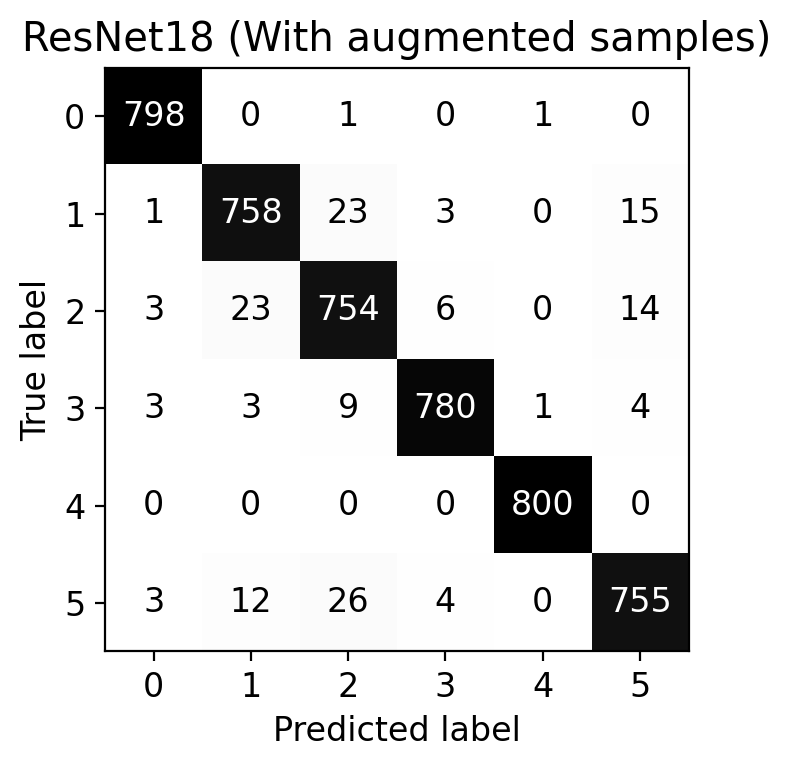

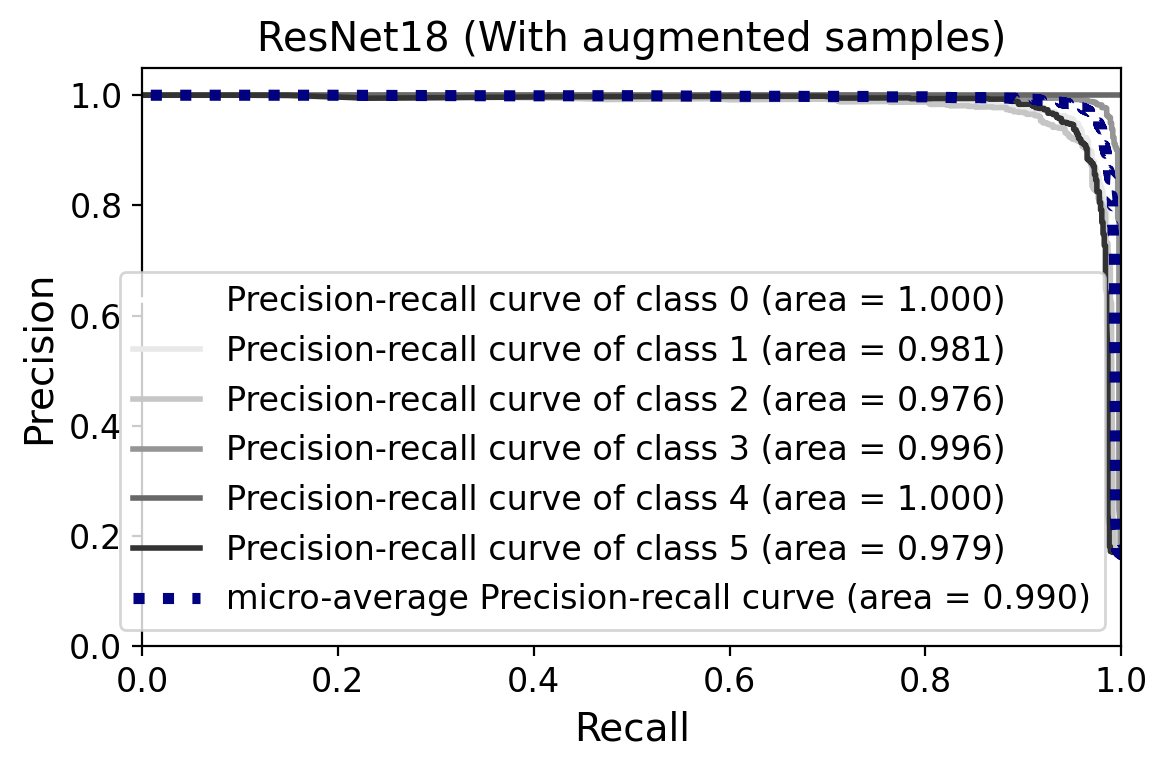

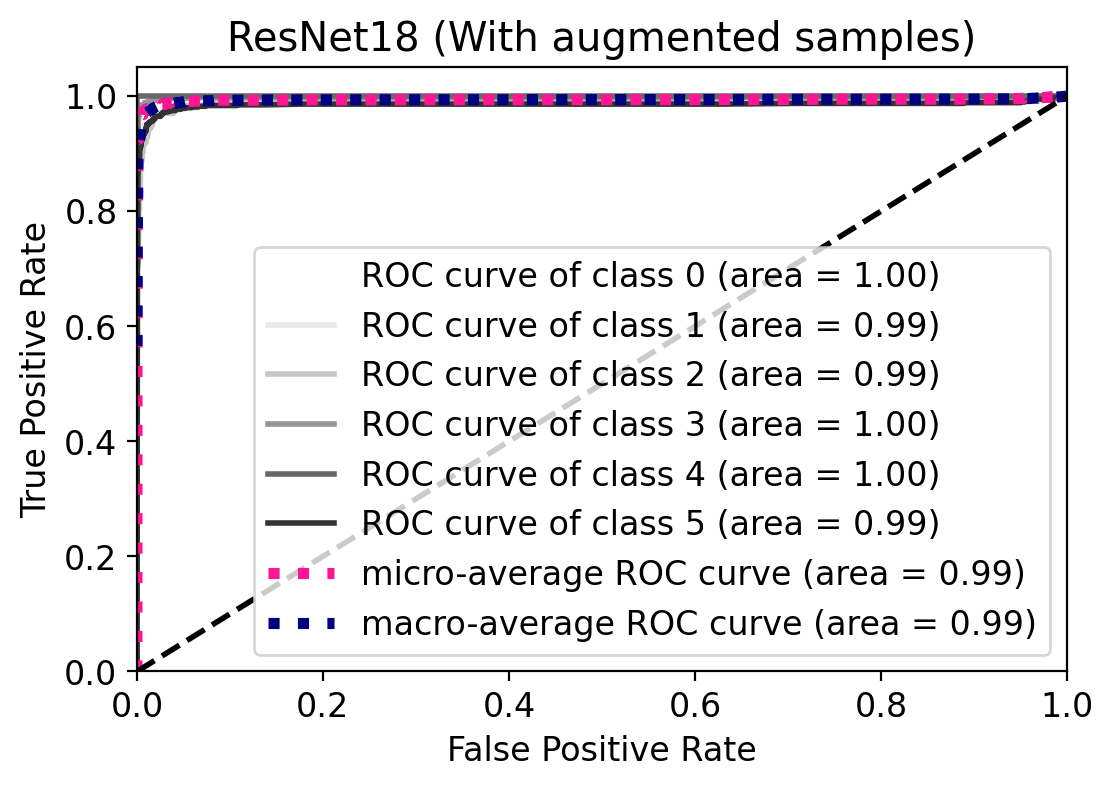

In [13]:
fig_save_path = str(ROOT.joinpath("results", "ResNet18", "with_augmented"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="ResNet18 (With augmented samples)",
    save_path=fig_save_path
)